## Importing Required Library

In [3]:
## All purpose library
import pandas as pd
import numpy as np

## NLP library
import re
import string
import nltk
from nltk.corpus import stopwords

## ML Library
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import pickle

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')

## The Data

In [4]:
#input the data using pandas

train=pd.read_csv("D:/Panggawean/soon to pe employee/NLP/disaster_response_messages_training.csv")
test=pd.read_csv("D:/Panggawean/soon to pe employee/NLP/disaster_response_messages_test.csv")

In [5]:
## Shape of Data
print("Train Dataset shape:\n",train.shape,"\n")
print("Test Dataset shape:\n",test.shape)

Train Dataset shape:
 (21046, 42) 

Test Dataset shape:
 (2629, 42)


In [6]:
#searcing missing/null values

print("Train Dataset missing data:\n",train.isnull().sum(),"\n")
print("Test Dataset missing data:\n",test.isnull().sum())

Train Dataset missing data:
 id                            0
split                         0
message                       0
original                  12855
genre                         0
related                       0
PII                           0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals  

## Visualization

,related
1,15795
0,5083
2,168


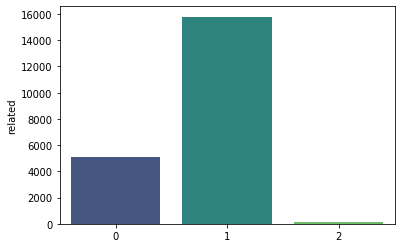

In [7]:
## using pandas value counts on target will give us number of 0's with is non disaster tweets,
## and 1's which is disaster tweets. 
VCtrain=train['related'].value_counts().to_frame()

## seaborn barplot to display barchart
sns.barplot(data=VCtrain,x=VCtrain.index,y="related",palette="viridis")
VCtrain

## Split The Data

In [8]:
train = train.loc[train["related"] <2]
test = test.loc[test["related"] <2]

In [9]:
train

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21041,30261,train,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21042,30262,train,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21043,30263,train,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21044,30264,train,"Some 2,000 women protesting against the conduc...",NaN,news,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,9,test,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,39,test,We are at Gressier we needs assistance right a...,Se gressier nou an difikilte tanpri vin ede nou,direct,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,49,test,"Delmas 33 in Silo, need water.",Delma 33 silo gen problem dlo,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,79,test,"SOS SOS, please provide police officers on the...",EMGENCY EMGENCY SI POLIS LA TE KA BAY PREZANS ...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,99,test,"I am a driver, a mechanic ,. I want to help","MWEN SE YON NMALIEN, CHOF, MEKANISYEN MWEN BEZ...",direct,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,30189,test,"UNHCR ($653,000) is supplying basic non-food i...",NaN,news,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2625,30209,test,One of the first organizations to respond to t...,NaN,news,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2626,30239,test,The President said that her Government always ...,NaN,news,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2627,30249,test,Following the severe floods which occurred ove...,NaN,news,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


,related
1,15795
0,5083


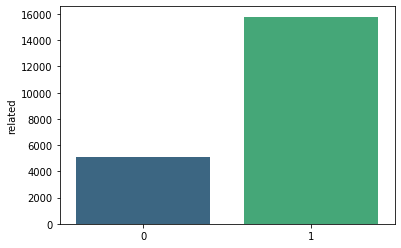

In [11]:
## using pandas value counts on target will give us number of 0's with is non disaster tweets,
## and 1's which is disaster tweets. 
VCtrain=train['related'].value_counts().to_frame()

## seaborn barplot to display barchart
sns.barplot(data=VCtrain,x=VCtrain.index,y="related",palette="viridis")
VCtrain

In [13]:
display("Random sample of disaster tweets:",train[train.related==1].message.sample(7).to_frame())
display("Random sample of non disaster tweets:",train[train.related==0].message.sample(7).to_frame())

'Random sample of disaster tweets:'

,message
3804,WE ARE SLEEPING IN THE STREETS IN CARREFOUR (K...
9499,WoW! Concepcion City is now 3.04 meters west o...
16049,PWJ staff also discovered that the sea water h...
10507,Families in need can come to TR Intermediate e...
5541,I would like to have all the information becau...
19255,"HARALD BRAUN (Germany), aligning his delegatio..."
9870,SAED. TAH. JAMPR. DSS. RAJNPR. No help received.


'Random sample of non disaster tweets:'

,message
16933,The three people include; Mrs. Shallah Mahaind...
1498,please i would like to find some information o...
18777,- Reduced price of cocoa for areas developing ...
15816,"The guys in Slovenia were fantastic, they work..."
15170,That included tightening control over social n...
19472,"Vuk Jeremic, President of the United Nations G..."
19794,The UAE-PAP administration said that the polio...


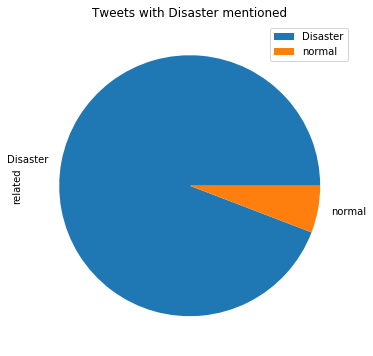

In [15]:
train[train.message.str.contains("disaster")].related.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="related",figsize=(12,6),title="Tweets with Disaster mentioned");

## Processing String

In [17]:
# lowering the message
train.message=train.message.apply(lambda x:x.lower() )
test.message=test.message.apply(lambda x:x.lower())
#removing square brackets
train.message=train.message.apply(lambda x:re.sub('\[.*?\]', '', x) )
test.message=test.message.apply(lambda x:re.sub('\[.*?\]', '', x) )
train.message=train.message.apply(lambda x:re.sub('<.*?>+', '', x) )
test.message=test.message.apply(lambda x:re.sub('<.*?>+', '', x) )
#removing puncuation
train.message=train.message.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test.message=test.message.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
train.message=train.message.apply(lambda x:re.sub('\n' , '', x) )
test.message=test.message.apply(lambda x:re.sub('\n', '', x) )
#remove words containing numbers
train.message=train.message.apply(lambda x:re.sub('\w*\d\w*' , '', x) )
test.message=test.message.apply(lambda x:re.sub('\w*\d\w*', '', x) )

In [18]:
disaster_tweets = train[train['related']==1]['message']
non_disaster_tweets = train[train['related']==0]['message']

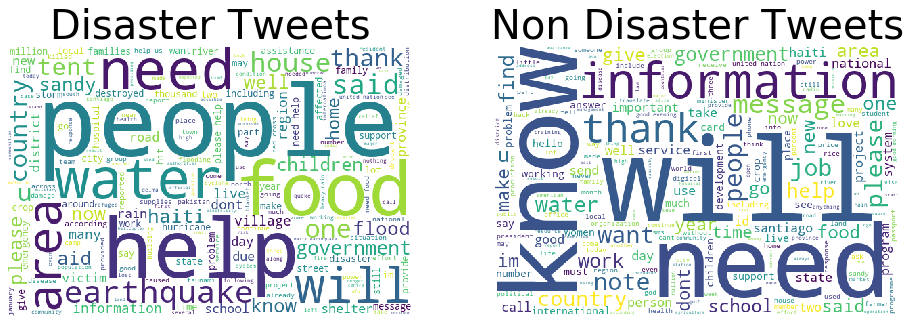

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [20]:
#Tokenizer
token=nltk.tokenize.RegexpTokenizer(r'\w+')
#applying token
train.message=train.message.apply(lambda x:token.tokenize(x))
test.message=test.message.apply(lambda x:token.tokenize(x))
#view
display(train.message.head())

0    [weather, update, a, cold, front, from, cuba, ...
1    [is, the, hurricane, over, or, is, it, not, over]
2    [says, west, side, of, haiti, rest, of, the, c...
3          [information, about, the, national, palace]
4                [storm, at, sacred, heart, of, jesus]
Name: message, dtype: object

In [21]:
nltk.download('stopwords')
#removing stop words
train.message=train.message.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test.message=test.message.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
#view
train.message.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0    [weather, update, cold, front, cuba, could, pa...
1                                          [hurricane]
2    [says, west, side, haiti, rest, country, today...
3                      [information, national, palace]
4                        [storm, sacred, heart, jesus]
Name: message, dtype: object

In [23]:
#stemmering the message and joining
stemmer = nltk.stem.PorterStemmer()
train.message=train.message.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test.message=test.message.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
#View
train.message.head()

0    weather updat cold front cuba could pass haiti
1                                          hurrican
2    say west side haiti rest countri today tonight
3                               inform nation palac
4                             storm sacr heart jesu
Name: message, dtype: object

In [25]:
count_vectorizer = CountVectorizer()
train_vectors_count = count_vectorizer.fit_transform(train['message'])
test_vectors_count = count_vectorizer.transform(test["message"])

In [27]:
CLR = LogisticRegression(C=2)
scores = cross_val_score(CLR, train_vectors_count, train["related"], cv=6, scoring="f1")
scores

array([0.8848236 , 0.81415929, 0.73273657, 0.86256263, 0.85102421,
       0.86323529])

In [28]:
NB_Vec = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(NB_Vec, train_vectors_count, train["related"], cv=cv, scoring="f1")
scores

array([0.88315724, 0.88183639, 0.8782757 , 0.87802607, 0.88609535,
       0.88397961, 0.8772854 , 0.8825524 , 0.88314502, 0.88322981,
       0.88489543, 0.88561339, 0.88412282, 0.879404  , 0.87655087])

In [29]:
NB_Vec.fit(train_vectors_count, train["related"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Pipeline ML

In [30]:
pipe = Pipeline([('Vectors', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),
     ('NB', MultinomialNB())])
pipe.fit(train.message.values, train["related"].values)

Pipeline(memory=None,
         steps=[('Vectors',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('NB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [31]:
with open('pipeline_model.pkl', 'wb') as model_file:
  pickle.dump(pipe, model_file)

In [32]:
with open('nb_class_model.pkl', 'wb') as model_file:
  pickle.dump(NB_Vec, model_file)

In [33]:
pred=NB_Vec.predict(test_vectors_count)

## Simple Program

In [38]:
Tweet=input(print('Enter the tweet! \n'))

Enter the tweet! 

Nonemy last exam was a disaster


In [39]:
predicted = pipe.predict([Tweet])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Non Disaster Tweet
